# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np 
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('https://raw.githubusercontent.com/ta-data-mex/lab-correlation-tests-with-scipy/master/your-code/fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here: 
fifa.head()



Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value Preferred Foot Position  Weak Foot  \
0         FC Barcelona  €110.5M           Left       RF        4.0   
1             Juventus     €77M          Right       ST        4.0   
2  Paris Saint-Germain  €118.5M          Right       LW        5.0   
3    Manchester United     €72M          Right       GK        3.0   
4      Manchester City    €102M          Right      RCM        5.0   

   Acceleration  SprintSpeed  Stamina  Strength  LongShots  Aggression  \
0          91.0         86.0     72.0      59.0       94.0        48.0   
1          89.0         91.0     88.0      79.0       93.0        63.0   
2          94.0         90.0     81.0      49.0       82.0        56.0   
3          57.0         58.0     43.0      64.0       12.0        38.0   
4          78.0         76.0     90.0      75.0       91.0        76.0   

   Interceptions  Positioning  Vision  Penalties  
0           22.0         94.0    94.0       75.0  
1           29.0         95.0    82.0       85.0  
2           36.0         89.0    87.0       81.0  
3           30.0         12.0    68.0       40.0  
4           61.0         87.0    94.0       79.0

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [6]:
# Your code here:

fifa['ValueNumeric']=[j[0].replace('€','')+j[1].replace('M','00000').replace('K','00')
 if len(j)>1 else j[0].replace('€','').replace('M','000000').replace('K','000')
  for i in fifa.Value for j in [i.split('.')] ]
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype(int)


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [7]:
# Your code here:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [18]:
from statsmodels import formula
fifa_f = 'fifa["ValueNumeric"] ~ C(fifa["Preferred Foot"]) + C(fifa["Position"])'

model = ols(formula=fifa_f, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

anova_table



sum_sq       df          F        PR(>F)
C(fifa["Preferred Foot"])  2.341622e+14      1.0   7.673655  5.608990e-03
C(fifa["Position"])        1.657002e+16     26.0  20.885022  1.634952e-96
Residual                   5.529029e+17  18119.0        NaN           NaN

What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [24]:
# Your code here:
fifa_f2 = ols('fifa["ValueNumeric"] ~ C(fifa["Nationality"])', data=fifa).fit()
sm.stats.anova_lm(fifa_f2, typ=2)



sum_sq       df         F         PR(>F)
C(fifa["Nationality"])  3.281224e+16    163.0  6.762478  4.840477e-134
Residual                5.370951e+17  18043.0       NaN            NaN

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [26]:
# Your code here:
fifa.dropna(inplace=True) 
fifa.head()



Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value Preferred Foot Position  Weak Foot  ...  \
0         FC Barcelona  €110.5M           Left       RF        4.0  ...   
1             Juventus     €77M          Right       ST        4.0  ...   
2  Paris Saint-Germain  €118.5M          Right       LW        5.0  ...   
3    Manchester United     €72M          Right       GK        3.0  ...   
4      Manchester City    €102M          Right      RCM        5.0  ...   

   SprintSpeed  Stamina  Strength  LongShots  Aggression  Interceptions  \
0         86.0     72.0      59.0       94.0        48.0           22.0   
1         91.0     88.0      79.0       93.0        63.0           29.0   
2         90.0     81.0      49.0       82.0        56.0           36.0   
3         58.0     43.0      64.0       12.0        38.0           30.0   
4         76.0     90.0      75.0       91.0        76.0           61.0   

   Positioning  Vision  Penalties  ValueNumeric  
0         94.0    94.0       75.0     110500000  
1         95.0    82.0       85.0      77000000  
2         89.0    87.0       81.0     118500000  
3         12.0    68.0       40.0      72000000  
4         87.0    94.0       79.0     102000000  

[5 rows x 21 columns]

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [28]:
# Your code here:

X = sm.add_constant(fifa[['SprintSpeed', 'Stamina']]) 
Y= fifa.ValueNumeric 

model = sm.OLS(Y, X).fit() 
predictions = model.predict(X) 

print_model = model.summary() 
print(print_model)



                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.04e-193
Time:                        14:03:05   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [30]:
# Your code here: 
X =sm.add_constant(fifa.Potential) 
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit() 
predict = model.predict(X)

print_model=model.summary() 
print(print_model)



                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:17:11   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [31]:
# Your code here: 
import seaborn as sn 



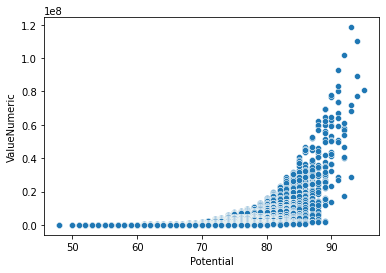

In [57]:
sn.scatterplot(data=fifa, x='Potential', y='ValueNumeric',)